# Red Wine - Clustering

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')
sns.set(context='notebook', palette='dark', color_codes=True)

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


## Import Dataset
Dataset was already preprocessed and checked on previous script, then there is no need to inspect the values.

In [2]:
df_red_wine = pd.read_csv("data/red_wine_preprocessed.csv", sep=';')
df_red_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


## Clustering
Objective is to group Red wines in Clusters to practice the technique and verify how the red wines cluster themselves into differente groups.

First it is necessary to standardize the data:

In [3]:
df_std = StandardScaler().fit_transform(df_red_wine)

Data will be clustered by K-means by measuring euclidean distance.

Number of clusters will vary from 1 to 20 in order to perform the Elbow plot.

In [4]:
n_clusters_interval = list(range(1,21))

models = []
wss = []
sil_score = []

for n_clusters in n_clusters_interval:
    # Fitting without Quality
    model = KMeans(n_clusters = n_clusters, random_state=42, algorithm = 'full').fit(df_std)
    models.append(model)
    wss.append(model.inertia_)
    
    if n_clusters == 1:
        sil_score.append(0)
    else:
        sil_score.append(silhouette_score(df_std, model.labels_, metric='euclidean'))


Elbow Plot

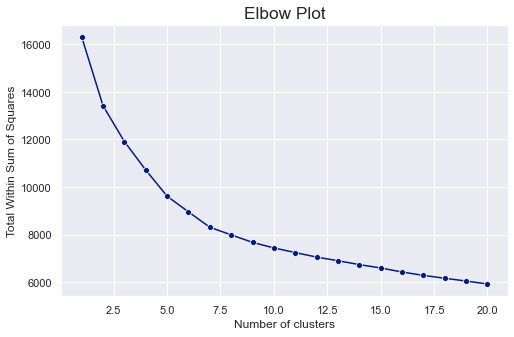

In [5]:
plt.figure(figsize=(8,5))
sns.lineplot(x = n_clusters_interval, y = wss, marker = 'o')

plt.title("Elbow Plot", size = "x-large")
plt.xlabel("Number of clusters")
plt.ylabel("Total Within Sum of Squares")

plt.show()

Silhoutte Plot

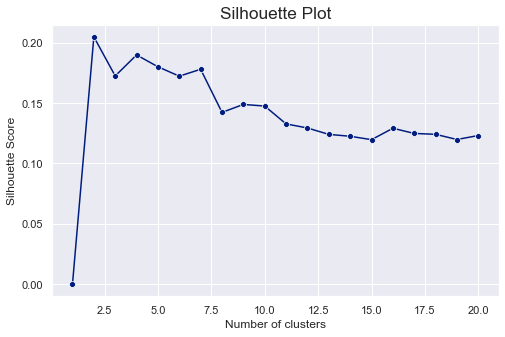

In [6]:
plt.figure(figsize=(8,5))
sns.lineplot(x = n_clusters_interval, y = sil_score, marker = 'o')

plt.title("Silhouette Plot", size = "x-large")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")

plt.show()

From the Elbow plot 7 clusters seem to be the best choice, while by the silhoutte plot 2 clusters have better score.

Total of 7 clusters will be chosen, since it is closer to the cardinality of the quality variable.

In [7]:
k = 7

model = models[k-1]


df_std = pd.DataFrame(df_std, columns = df_red_wine.columns)

df_red_wine['cluster'] = model.labels_
df_std['cluster'] = model.labels_

## Exploring Cluster's Characteristics

Data will be grouped by each cluster and calculate the mean of each variable in order to analyze and extract characteristics that represent them.

The chart will be plotted with the standardized varibles in order to provide better visualization of all variables (with different scales) in the same chart. 

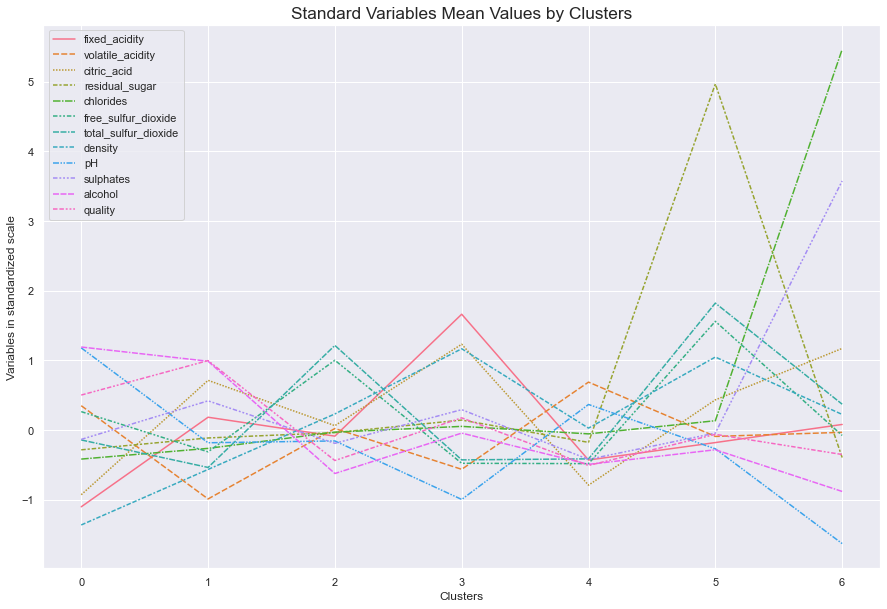

In [8]:
cluster_stats = df_red_wine.groupby('cluster').agg(['count', np.mean])

# Stats will be standardized for better visualization in the same chart
stats_std = df_std.groupby('cluster').agg(['count', np.mean])

plt.figure(figsize=(15,10))

sns.lineplot(data = stats_std.xs('mean', axis = 1, level = 1))

plt.title("Standard Variables Mean Values by Clusters", size='x-large')
plt.xlabel("Clusters")
plt.ylabel("Variables in standardized scale")

plt.show()

In [9]:
cluster_stats.xs('mean', axis = 1, level = 1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,6.395808,0.593204,0.090659,2.138323,0.067503,18.640719,42.041916,0.994162,3.492395,0.635629,11.720160,6.035928
1,8.628070,0.348333,0.411579,2.368202,0.075083,12.614035,28.859649,0.995650,3.281316,0.730044,11.499561,6.442982
2,8.156643,0.533269,0.284441,2.471329,0.086594,26.340909,87.351399,0.997139,3.285385,0.625979,9.756410,5.262238
3,11.195238,0.426167,0.512905,2.715238,0.090667,10.900000,32.490476,0.998887,3.155238,0.708429,10.383492,5.766667
4,7.561743,0.655169,0.117530,2.283051,0.085356,10.846247,32.973366,0.996758,3.366513,0.586683,9.898507,5.203390
5,7.996429,0.512500,0.356786,9.237500,0.094679,32.178571,107.642857,0.998664,3.267857,0.651071,10.125000,5.571429
6,8.448148,0.523333,0.501111,1.988889,0.357741,15.074074,59.185185,0.997126,3.057037,1.268519,9.477778,5.333333


From the chart and table above we can observe some characteristics of the clusters

 - Cluster 0: Low `density`, `fixed acidity` and `citric acid`, High `alcohol` and `quality`
 - Cluster 1: High `quality` and `acohol` with Low `volatile acidity`
 - Cluster 2: High `free sulfur dioxide` and `total sulfur dioxide`, but lower than cluster 5
 - Cluster 3: High `density`, `fixed acidity` and `citric acid`
 - Cluster 4: High `volatile acidity` and Low `citric acid` and `sulphates`
 - Cluster 5: High `residual sugar`, `free sulfur dioxide` and `total sulfur dioxide`
 - Cluster 6: High `chlorides` and `sulphates`, Low `Ph` and `alcohol`
 
Let's confirm these mean characteristics are good indicators of the clusters or if they are just driven by outliers.

In [10]:
cluster_characteristics = []
cluster_characteristics.append(['density', 'fixed_acidity', 'citric_acid', 'alcohol', 'quality'])
cluster_characteristics.append(['quality', 'alcohol', 'volatile_acidity'])
cluster_characteristics.append(['free_sulfur_dioxide', 'total_sulfur_dioxide'])
cluster_characteristics.append(['density', 'fixed_acidity', 'citric_acid'])
cluster_characteristics.append(['volatile_acidity', 'citric_acid', 'sulphates'])
cluster_characteristics.append(['residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide'])
cluster_characteristics.append(['chlorides', 'sulphates', 'pH', 'alcohol'])


### Scatter Plot View

Let's implement a plotting function to scatter data of all clusters in regard of the specified main features of each cluster.

In [11]:
def scatterplot_cluster(df, cluster, characteristics, alpha = 0.3):
    if len(characteristics) < 2:
        return -1
    
    chart_size = 8
    fig_columns = 2
    n_plots = int(np.ceil(len(characteristics)/2))
    fig_rows = int(np.ceil(n_plots / fig_columns))
    
    df_f = df[df.cluster == cluster]
    cmap_name = 'tab10'
    cmap = matplotlib.cm.get_cmap(cmap_name)
    
    fig, axes = plt.subplots(fig_rows, fig_columns, 
                             figsize=(chart_size * fig_columns, chart_size * fig_rows))
    fig.suptitle(f"Cluster {cluster} Analysis", size='xx-large')

    for plot in range(n_plots):
        if fig_rows > 1:
            ax = axes[plot//fig_columns][plot%fig_columns]
        else:
            ax = axes[plot]
        
        var1 = characteristics[2*plot]
        # Check if last plot needs to pick previous characteristic
        if 2*plot == len(characteristics)-1:
            var2 = characteristics[2*plot-1]
        else:
            var2 = characteristics[2*plot+1]
            
        # Plot all points with transparency
        sns.scatterplot(data = df, x = var1, y = var2, ax=ax, 
                        hue='cluster', palette = cmap_name, alpha = alpha)
        # Plot points of selected cluster with full opacity
        sns.scatterplot(data = df_f, x = var1, y = var2, ax=ax, color = cmap(cluster))
        
        ax.set_title(var1.title().replace("_", " ") + " x " + var2.title().replace("_", " "))
        ax.legend(title = "Cluster")

    plt.tight_layout()
    plt.show()

#### Cluster 0

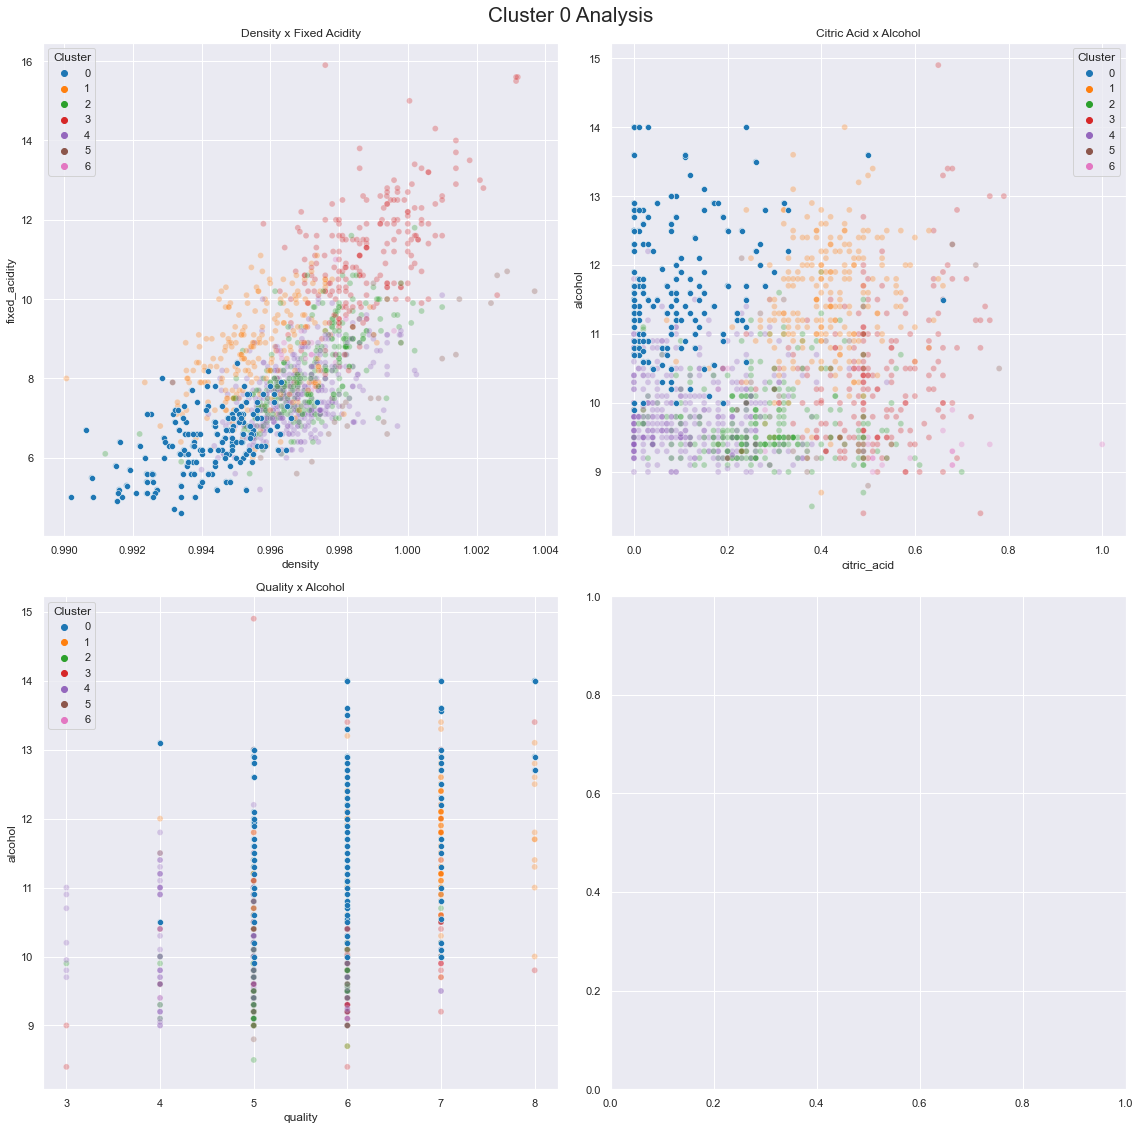

In [12]:
cluster = 0

scatterplot_cluster(df_red_wine, cluster, cluster_characteristics[cluster])

#### Cluster 1

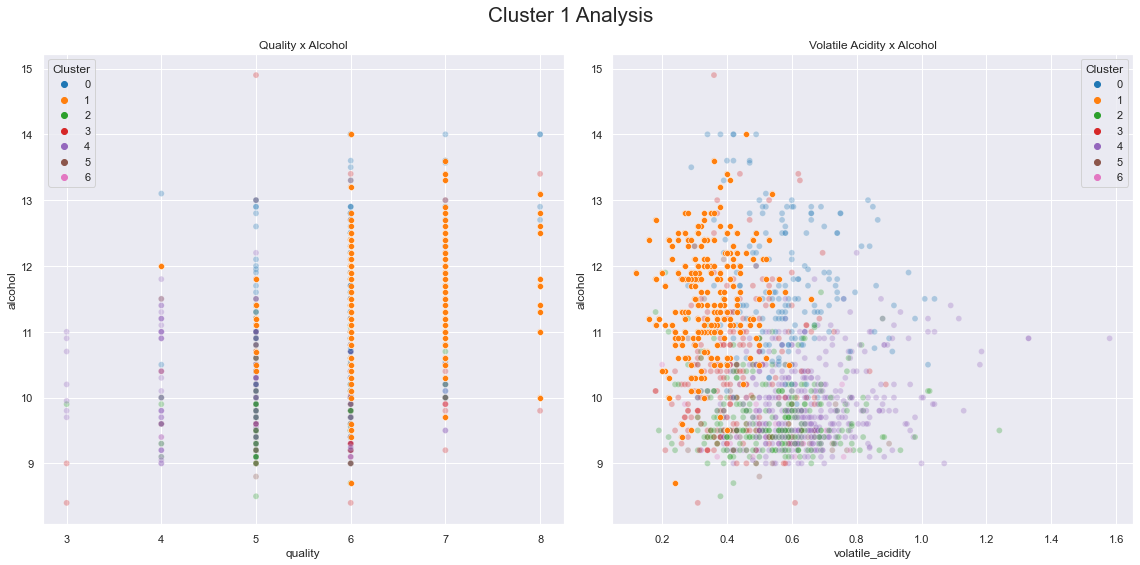

In [13]:
cluster = 1

scatterplot_cluster(df_red_wine, cluster, cluster_characteristics[cluster])

#### Cluster 2

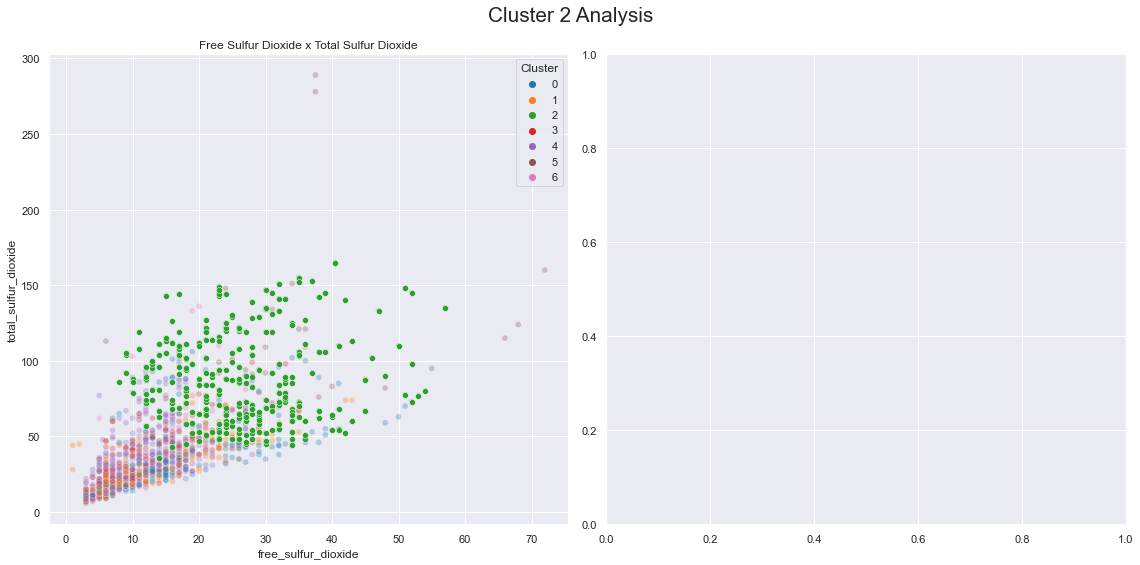

In [14]:
cluster = 2

scatterplot_cluster(df_red_wine, cluster, cluster_characteristics[cluster])

#### Cluster 3

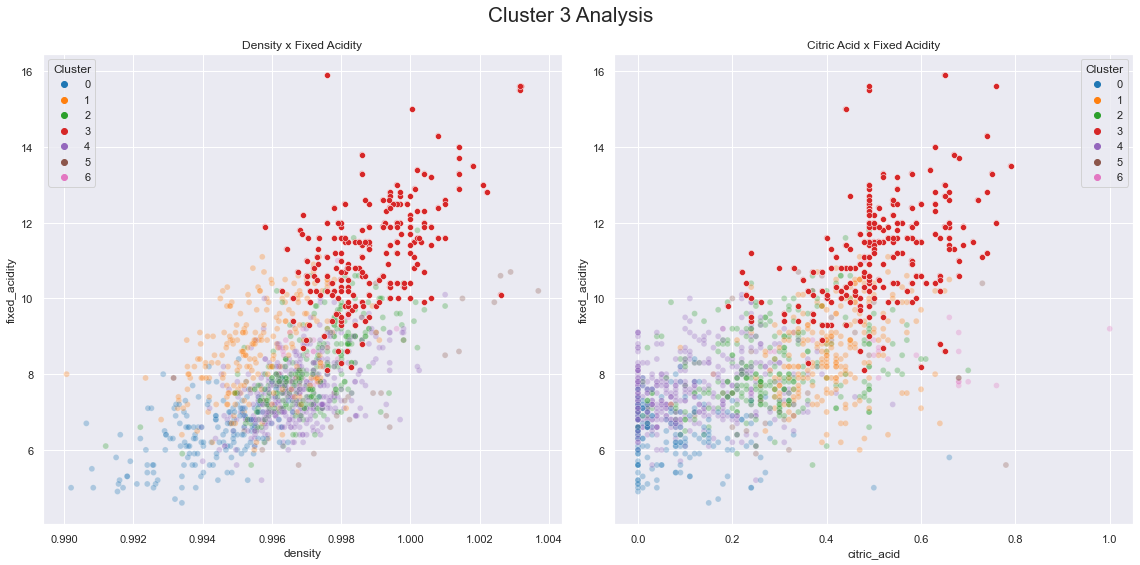

In [15]:
cluster = 3

scatterplot_cluster(df_red_wine, cluster, cluster_characteristics[cluster])

#### Cluster 4

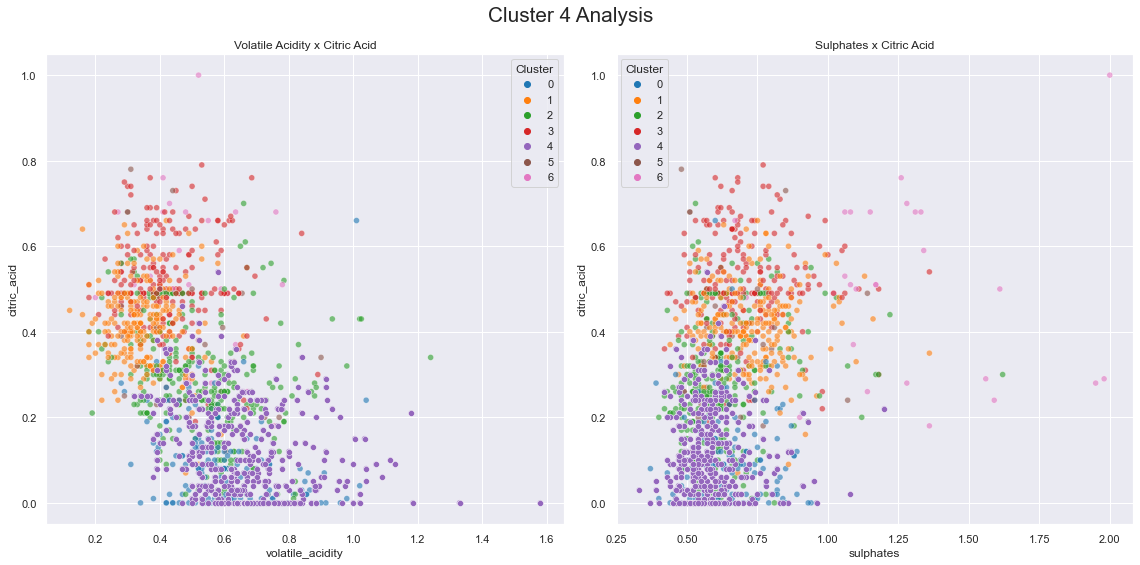

In [16]:
cluster = 4

scatterplot_cluster(df_red_wine, cluster, cluster_characteristics[cluster], alpha = 0.6)

#### Cluster 5

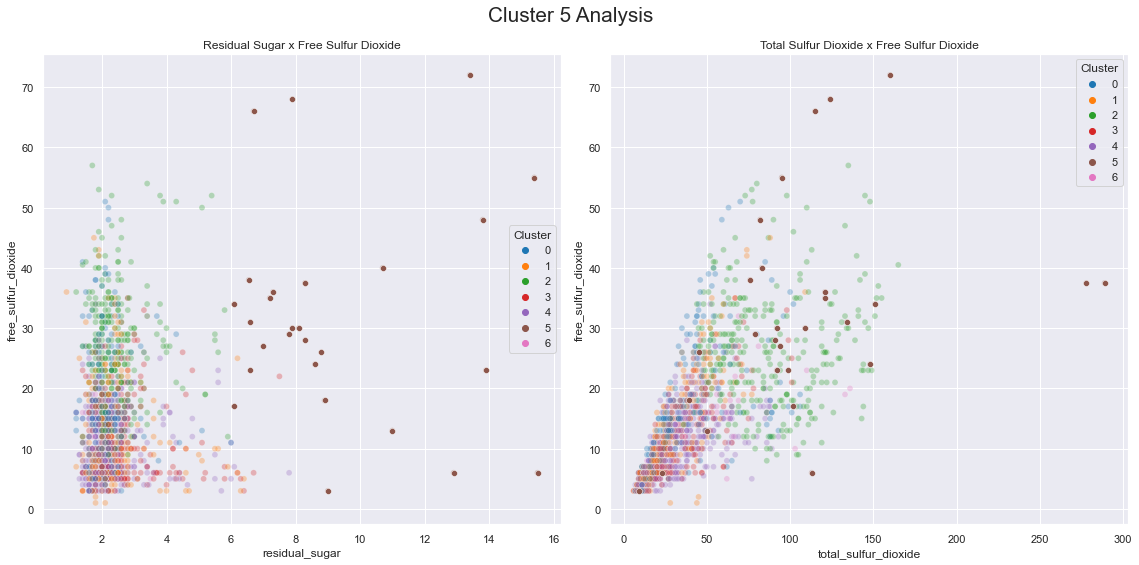

In [17]:
cluster = 5

scatterplot_cluster(df_red_wine, cluster, cluster_characteristics[cluster])

#### Cluster 6

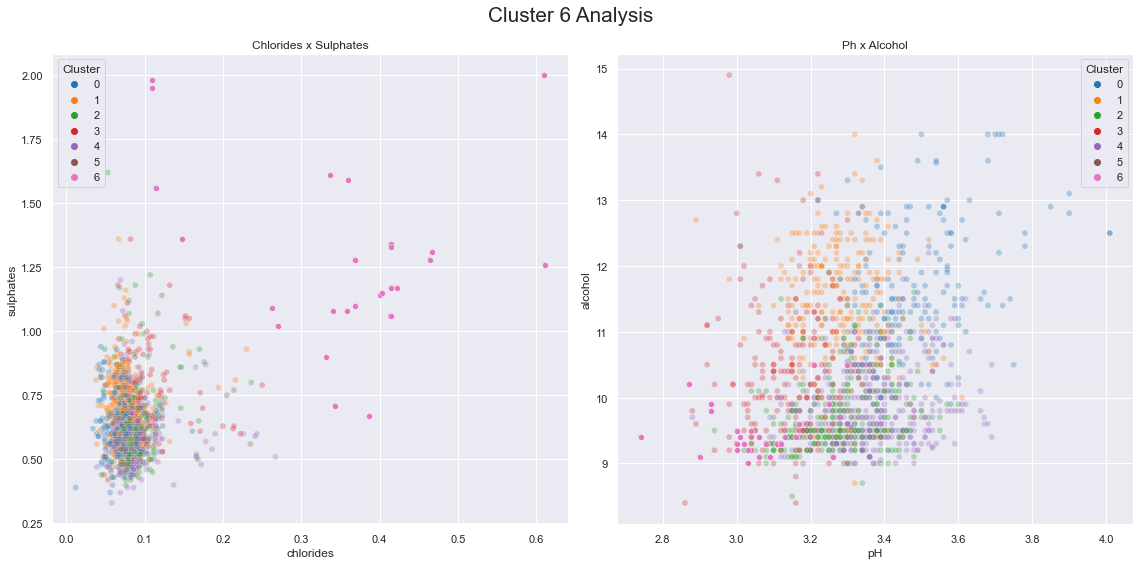

In [18]:
cluster = 6

scatterplot_cluster(df_red_wine, cluster, cluster_characteristics[cluster])

### Violin Plot View

Violin Plots may present a better way to visualize the distribution of each variable on each cluster.

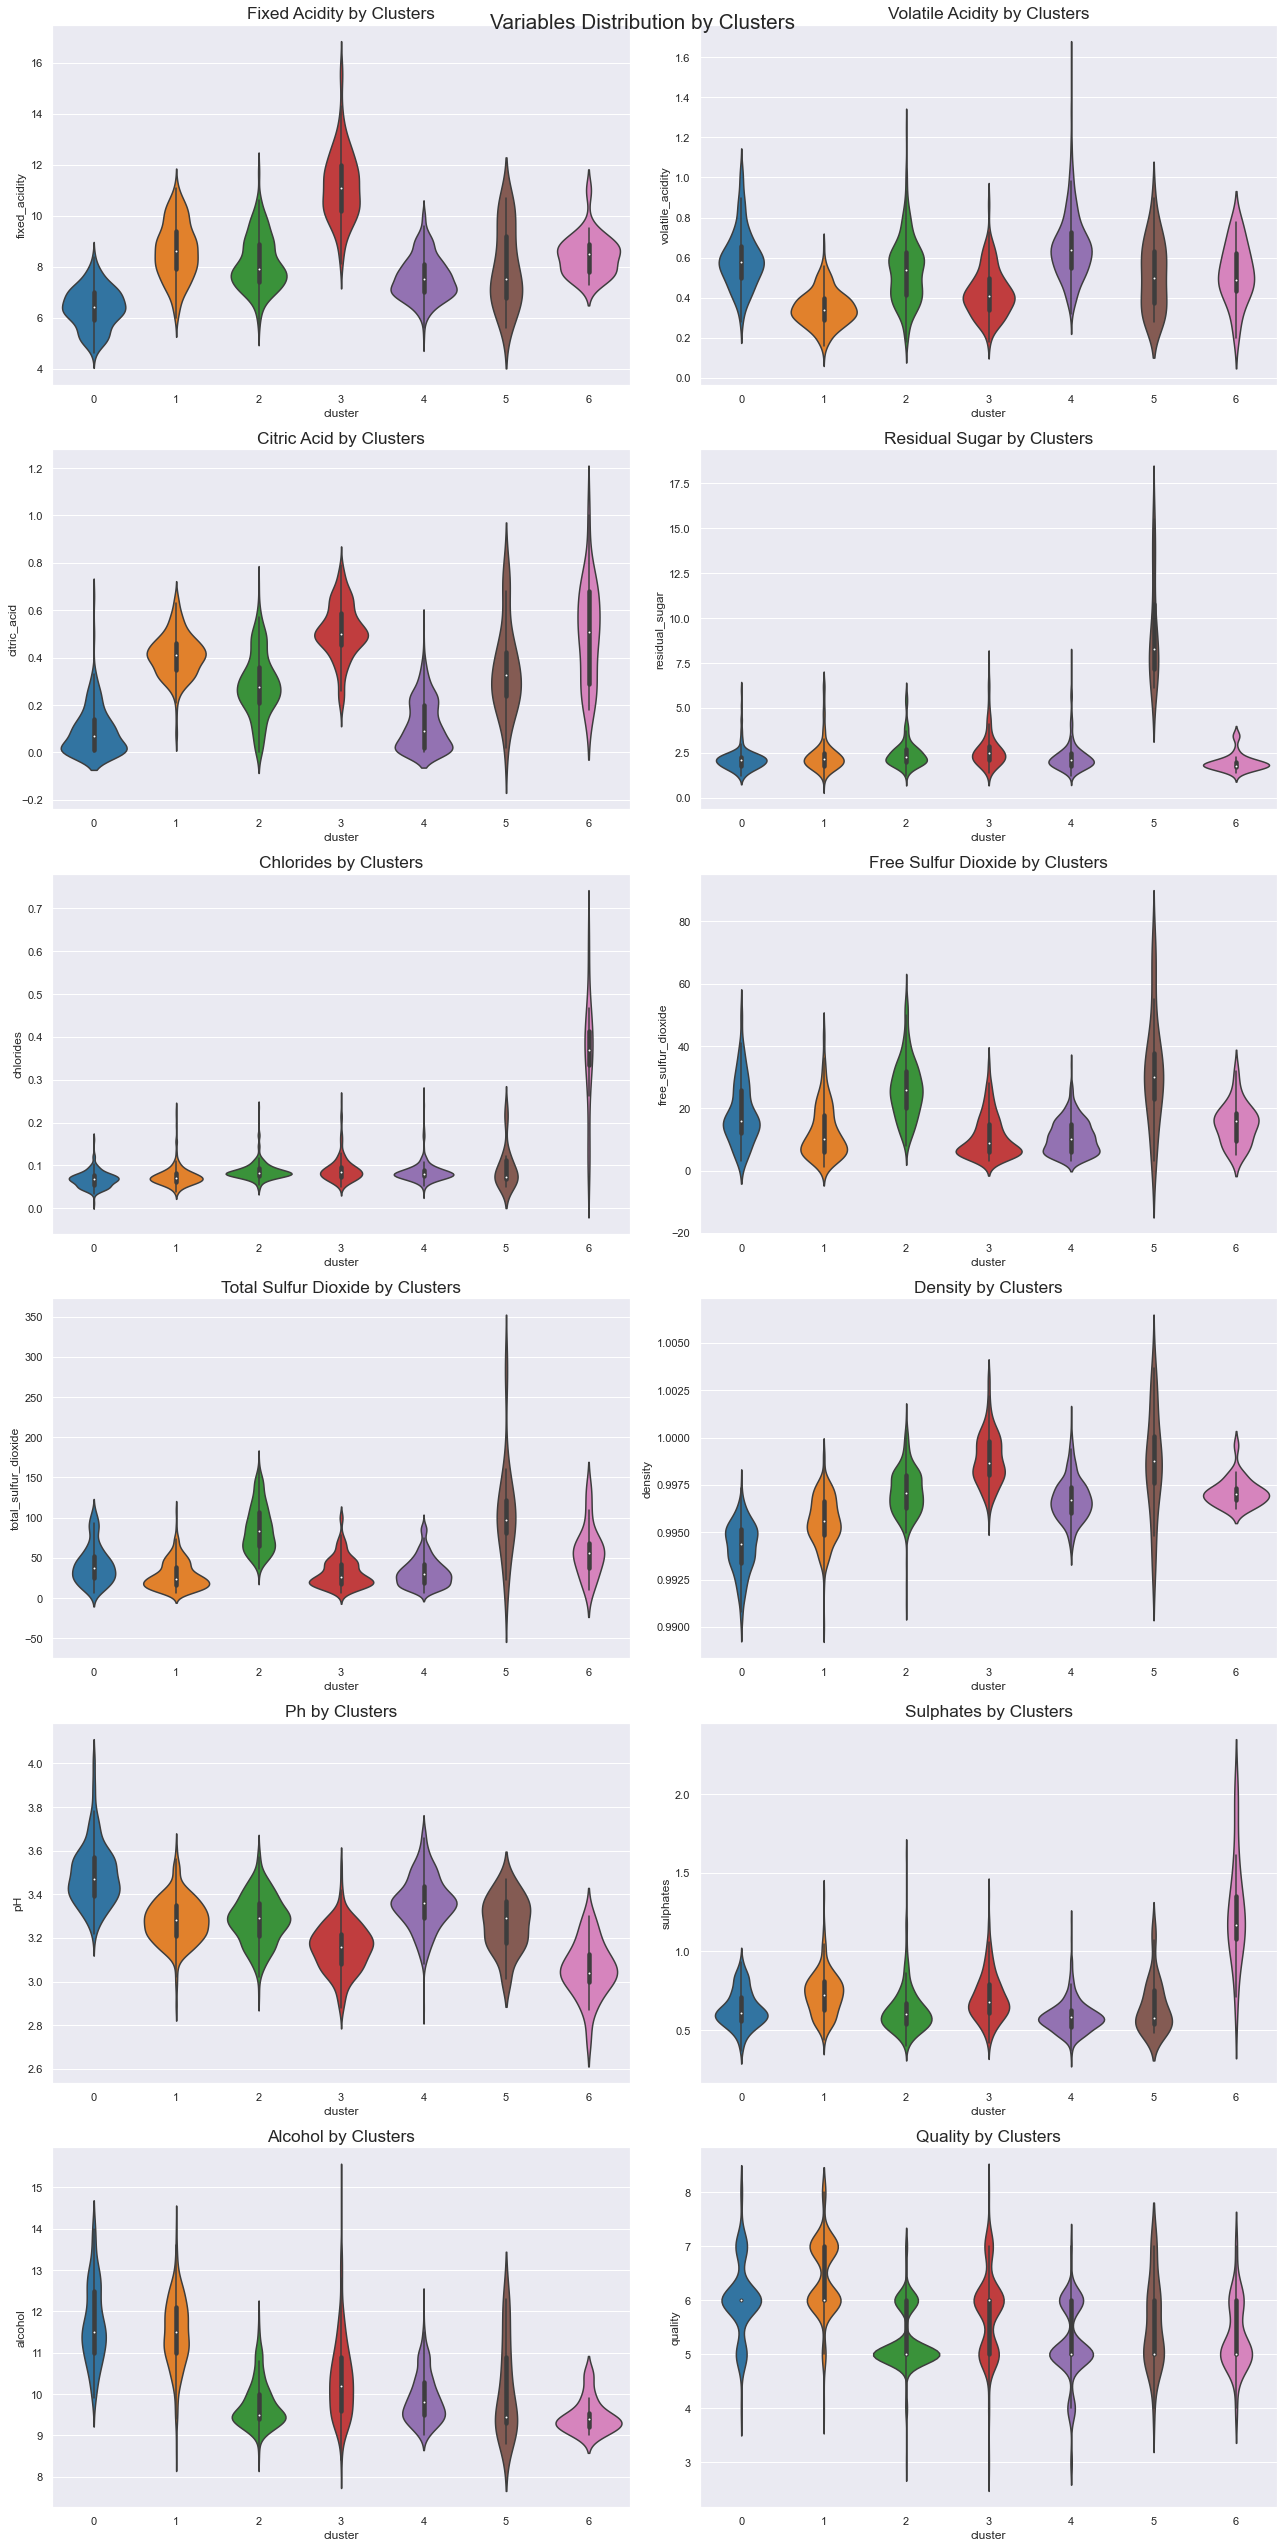

In [19]:
chart_size = (9,6)
fig_columns = 2
# Removes cluster from plotting
variables = df_red_wine.columns[:-1]
n_plots = len(variables)

fig_rows = int(np.ceil(n_plots / fig_columns))

fig, axes = plt.subplots(fig_rows, fig_columns, 
                             figsize=(chart_size[0] * fig_columns, chart_size[1] * fig_rows))
fig.suptitle(f"Variables Distribution by Clusters", size='xx-large')

for plot, var in enumerate(variables):
    if fig_rows > 1:
        ax = axes[plot//fig_columns][plot%fig_columns]
    else:
        ax = axes[plot]
    
    sns.violinplot(data = df_red_wine,
                   y = var,
                   x = 'cluster',
                   palette = 'tab10',
                   ax = ax)
    ax.set_title(var.title().replace("_", " ") + " by Clusters", size='x-large')
    
plt.tight_layout()
plt.show()

Export clustered dataset

In [ ]:
df_red_wine.to_csv('data/red_wine_cluster.csv', sep='')